# DATA ANZ VIRTUAL INTERNSHIP:
 ## -BY VIDULA AROLKAR

# Importing necessary Libraries:

In [1]:

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

# Loading and Reading the data:

In [2]:
df = pd.read_excel(r"E:\data science\ANZ_internship\ANZ synthesised transaction dataset.xlsx"  )
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.shape

(12043, 23)

## There are 12043 observations ad 23 features in this data set.

In [4]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [7]:
df['account'].nunique()

100

In [8]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [9]:
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

## There are 100 unique accounts in all.

# DATA  CLEANING AND PREPARATION:

In [10]:
missing = round((df.isnull().mean())*100,2).sort_values(ascending=False)
missing

merchant_code        92.67
bpay_biller_code     92.65
card_present_flag    35.92
merchant_state       35.92
merchant_suburb      35.92
merchant_id          35.92
merchant_long_lat    35.92
movement              0.00
first_name            0.00
account               0.00
currency              0.00
long_lat              0.00
txn_description       0.00
date                  0.00
balance               0.00
gender                0.00
age                   0.00
extraction            0.00
amount                0.00
transaction_id        0.00
country               0.00
customer_id           0.00
status                0.00
dtype: float64

# Missing Values in the complete data set:

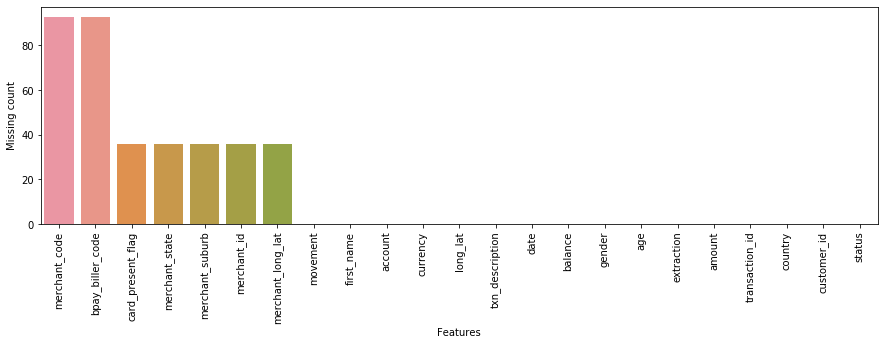

In [11]:
plt.figure(figsize=(15,4))

plt.xticks(rotation='90')

sns.barplot(x=missing.index, y = missing)

plt.xlabel('Features')

plt.ylabel('Missing count')

plt.show()

In [12]:
miss_50 = df[missing[missing > 50].index]
miss_50.head()

,merchant_code,bpay_biller_code
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


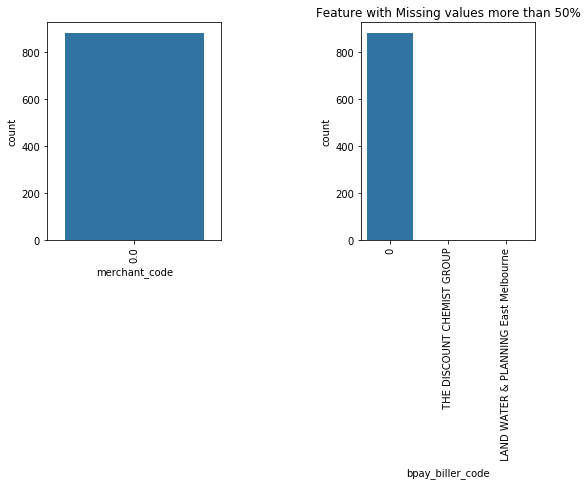

In [13]:
plt.figure(figsize = (20,4))

c = 1

for i in miss_50.columns:
    plt.subplot(1,4,c)
    plt.xticks(rotation ='90')
    sns.countplot(x=i,data = df)
    c += 1 
    
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.8)

plt.title('Feature with Missing values more than 50%')

plt.show()

In [14]:
print(df['merchant_code'].value_counts())

print(df['bpay_biller_code'].value_counts())

0.0    883
Name: merchant_code, dtype: int64
0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64


## We can see that there is no Variance in the data. Hence we can drop this columns.

In [15]:
df = df.drop(['merchant_code','bpay_biller_code'], axis =1 )
df.head()


,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [16]:
missing1 = round((df.isnull().mean())*100,2).sort_values(ascending=False)
missing1


card_present_flag    35.92
merchant_state       35.92
merchant_suburb      35.92
merchant_id          35.92
merchant_long_lat    35.92
movement              0.00
balance               0.00
account               0.00
currency              0.00
long_lat              0.00
txn_description       0.00
first_name            0.00
gender                0.00
date                  0.00
age                   0.00
extraction            0.00
amount                0.00
transaction_id        0.00
country               0.00
customer_id           0.00
status                0.00
dtype: float64

In [17]:
miss_30 = df[missing1[missing1 > 30].index]
miss_30.head()

,card_present_flag,merchant_state,merchant_suburb,merchant_id,merchant_long_lat
0,1.0,QLD,Ashmore,81c48296-73be-44a7-befa-d053f48ce7cd,153.38 -27.99
1,0.0,NSW,Sydney,830a451c-316e-4a6a-bf25-e37caedca49e,151.21 -33.87
2,1.0,NSW,Sydney,835c231d-8cdf-4e96-859d-e9d571760cf0,151.21 -33.87
3,1.0,QLD,Buderim,48514682-c78a-4a88-b0da-2d6302e64673,153.05 -26.68
4,1.0,QLD,Mermaid Beach,b4e02c10-0852-4273-b8fd-7b3395e32eb0,153.44 -28.06


#### All the merchant related data is missing, hence we can drop those rows instead.

In [18]:
cols = ['merchant_state', 'merchant_suburb', 'merchant_long_lat']
for x in cols:
    df[x] = df[x].fillna('No merchant')
    
df['merchant_id'] = df['merchant_id'].fillna(0)

df.shape

(12043, 21)

In [19]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [20]:
df= df.drop('card_present_flag', axis =1)

In [21]:
missing2 = round((df.isnull().mean())*100,2).sort_values(ascending=False)
missing2


movement             0.0
merchant_long_lat    0.0
account              0.0
currency             0.0
long_lat             0.0
txn_description      0.0
merchant_id          0.0
first_name           0.0
balance              0.0
date                 0.0
gender               0.0
age                  0.0
merchant_suburb      0.0
merchant_state       0.0
extraction           0.0
amount               0.0
transaction_id       0.0
country              0.0
customer_id          0.0
status               0.0
dtype: float64

## The data is clean now, We can proceed with the Analysis.

# EXPLORATORY DATA ANALYSIS:

In [22]:
df['date']=pd.to_datetime(df['date'])

In [23]:
#Total Number of transactions:
df['date'].value_counts().mean()

132.34065934065933

### On an average, 132 transactions are made each day.

In [24]:
df['Month']=df['date'].dt.month
df.head()

,status,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Month
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8


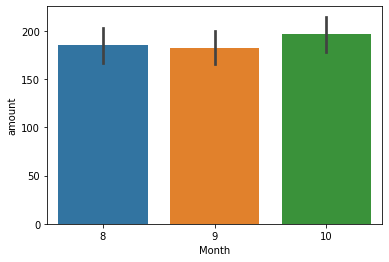

In [25]:
sns.barplot(x='Month', y='amount' ,data=df)


In [26]:
df['amount'].mean()

187.93358797641767

In [27]:
df['amount'].median()

29.0

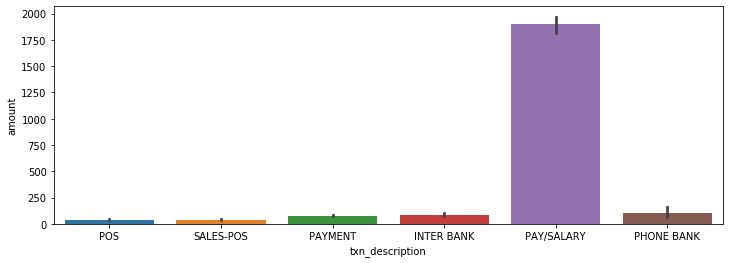

In [28]:
plt.figure(figsize=(12,4))
sns.barplot(x='txn_description', y='amount' ,data=df)

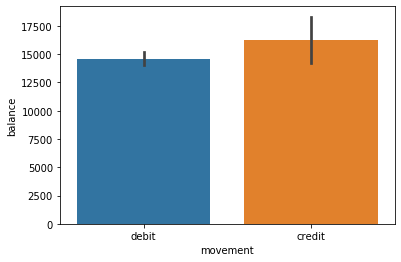

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x='movement', y='balance' ,data=df)

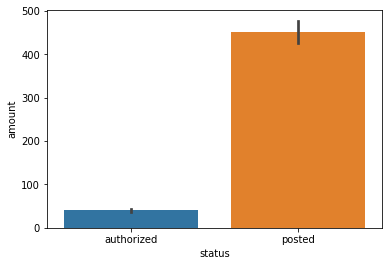

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(x='status', y='amount' ,data=df)

In [31]:
df["extraction"] = pd.to_datetime(df['extraction'])

Text(0, 0.5, 'Freq')

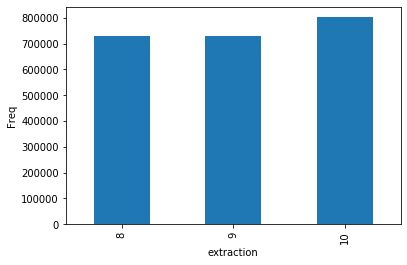

In [32]:
df.amount.groupby(df["extraction"].dt.month).sum().plot(kind="bar")
plt.ylabel("Freq")

In [33]:
df_aug= df[df['Month']==8]
df_sep= df[df['Month']==9]
df_oct= df[df['Month']==10]

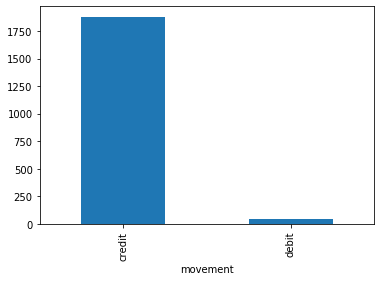

In [34]:
df_aug.amount.groupby(df_aug["movement"]).mean().plot(kind='bar')

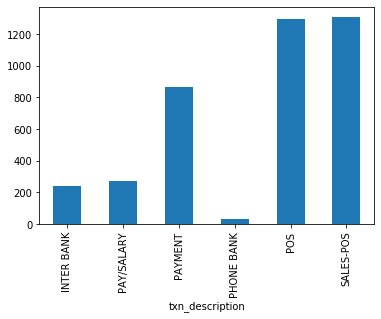

In [35]:
df_sep.amount.groupby(df_sep["txn_description"]).count().plot(kind='bar')

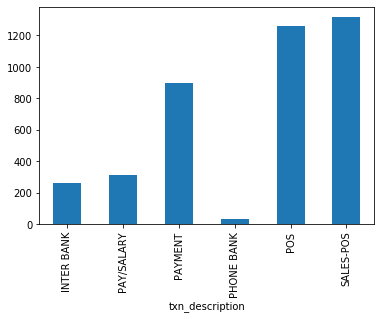

In [36]:
df_oct.amount.groupby(df_oct["txn_description"]).count().plot(kind='bar')

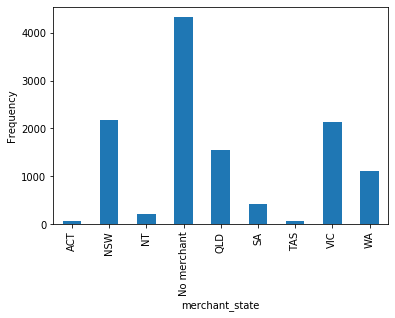

In [37]:
df.amount.groupby(df['merchant_state']).count().plot(kind="bar")
plt.ylabel("Frequency")
plt.show()


([<matplotlib.axis.XTick at 0x17f8751c288>,
 <a list of 7 Text xticklabel objects>)

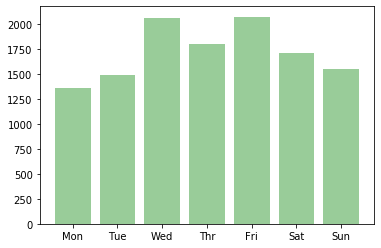

In [38]:
def get_weekday(date):
    return date.weekday()

df['weekday'] = df['date'].map(get_weekday)
df.tail()

plt.hist(df.weekday, bins=7, range=(-0.5,6.5), alpha=0.4, color='green', rwidth=0.8)
plt.xticks(range(7), 'Mon Tue Wed Thr Fri Sat Sun'.split())

### MEAN TRANSACTION PER DAY:

In [39]:
day_mean = df.groupby('date')['amount'].mean().reset_index()
day_mean.head()

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


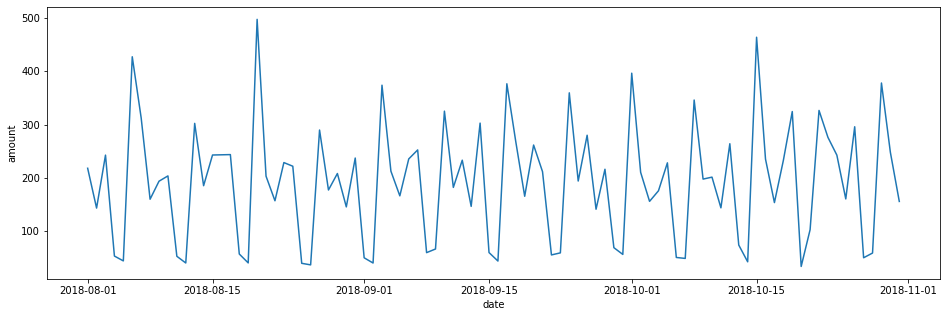

In [40]:
plt.figure(figsize=(16,5))
sns.lineplot( y='amount',x='date', data = day_mean)

In [41]:
mer_total = df.groupby(['merchant_state','gender'])['amount'].sum().reset_index()
mer_total.head()

,merchant_state,gender,amount
0,ACT,F,1657.44
1,ACT,M,3219.24
2,NSW,F,41430.88
3,NSW,M,60590.89
4,NT,F,8741.42


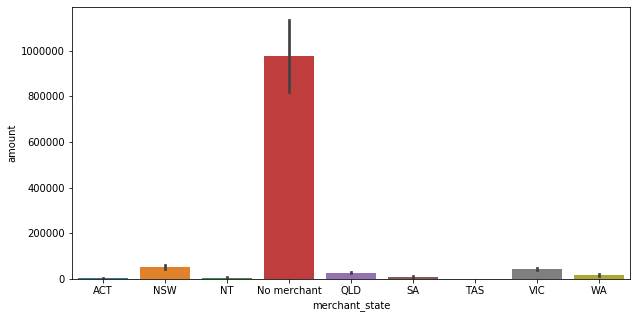

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='merchant_state', y='amount',data=mer_total)

In [43]:
mer_sub= df.groupby(["merchant_suburb"])["amount"].sum().reset_index()
mer_sub

,merchant_suburb,amount
0,Abbotsford,2004.29
1,Aberdeen,52.45
2,Aberfeldie,57.77
3,Aberfoyle Park,84.92
4,Acacia Ridge,10.30
...,...,...
1605,Yulara,80.07
1606,Yungaburra,105.38
1607,Zetland,78.47
1608,Zillmere,38.63


In [44]:
suburb_sorted=mer_sub.sort_values(by='amount', ascending=False)

In [45]:
#top 5 suburbs:
suburb_sorted.head()

,merchant_suburb,amount
1046,No merchant,1953417.85
1381,Sydney,21675.44
893,Melbourne,11943.53
1323,South Brisbane,11740.58
880,Mascot,10282.62


In [46]:
bal_mean= df.groupby(["date",'merchant_state'])["balance"].mean().reset_index()
bal_mean.head(5)

,date,merchant_state,balance
0,2018-08-01,NSW,3570.146429
1,2018-08-01,NT,366.056667
2,2018-08-01,No merchant,12764.785094
3,2018-08-01,QLD,5459.165294
4,2018-08-01,SA,5728.495000


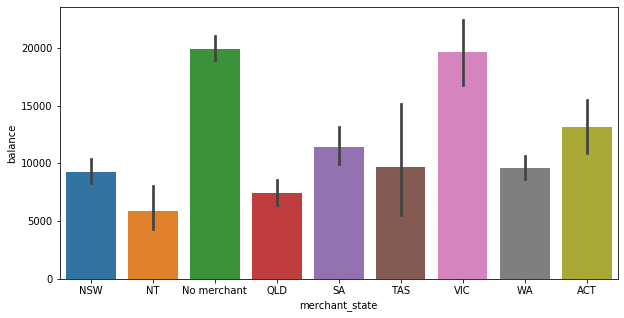

In [47]:
#Account balance over various states:
plt.figure(figsize=(10,5))
sns.barplot(x='merchant_state', y='balance',data=bal_mean)

In [48]:
age_amt= df.groupby(['age',"gender"])["amount"].sum().reset_index()
age_amt.head()

,age,gender,amount
0,18,F,45124.14
1,18,M,34020.50
2,19,F,84318.80
3,19,M,61733.92
4,20,F,49579.79


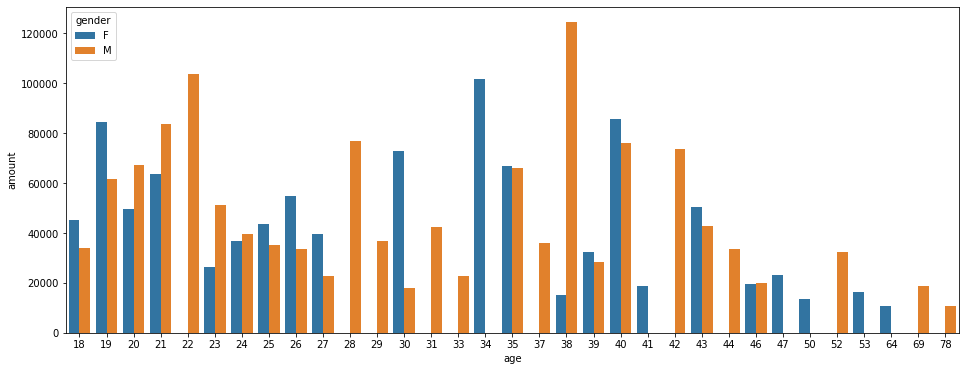

In [49]:
plt.figure(figsize=(16, 6))
sns.barplot(y="amount", x="age",hue='gender',data=age_amt)


In [50]:
df['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [51]:
df['currency'].value_counts()

AUD    12043
Name: currency, dtype: int64

In [52]:
df= df.drop(['country', 'currency',], axis=1)


In [53]:
df.columns

Index(['status', 'account', 'long_lat', 'txn_description', 'merchant_id',
       'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb',
       'merchant_state', 'extraction', 'amount', 'transaction_id',
       'customer_id', 'merchant_long_lat', 'movement', 'Month', 'weekday'],
      dtype='object')

### SELECTING ONLY RELEVANT VARIABLES:

In [54]:
new_df = df[['customer_id' ,'status','balance','gender','age', 'movement' ,'txn_description','merchant_state','amount']]
new_df.head()

,customer_id,status,balance,gender,age,movement,txn_description,merchant_state,amount
0,CUS-2487424745,authorized,35.39,F,26,debit,POS,QLD,16.25
1,CUS-2487424745,authorized,21.20,F,26,debit,SALES-POS,NSW,14.19
2,CUS-2142601169,authorized,5.71,M,38,debit,POS,NSW,6.42
3,CUS-1614226872,authorized,2117.22,F,40,debit,SALES-POS,QLD,40.90
4,CUS-2487424745,authorized,17.95,F,26,debit,SALES-POS,QLD,3.25


In [55]:
new_df['status'] = new_df['status'] .apply(lambda x: 1 if x=='authorized' else 0)

new_df['gender'] = new_df['gender'] .apply(lambda x: 1 if x=='M' else 0)

new_df['movement'] = new_df['movement'] .apply(lambda x: 1 if x=='debit' else 0)

In [56]:
new_df.head()

,customer_id,status,balance,gender,age,movement,txn_description,merchant_state,amount
0,CUS-2487424745,1,35.39,0,26,1,POS,QLD,16.25
1,CUS-2487424745,1,21.20,0,26,1,SALES-POS,NSW,14.19
2,CUS-2142601169,1,5.71,1,38,1,POS,NSW,6.42
3,CUS-1614226872,1,2117.22,0,40,1,SALES-POS,QLD,40.90
4,CUS-2487424745,1,17.95,0,26,1,SALES-POS,QLD,3.25


### CORRELATION PLOT:

Text(0.5, 1, 'Correlation data')

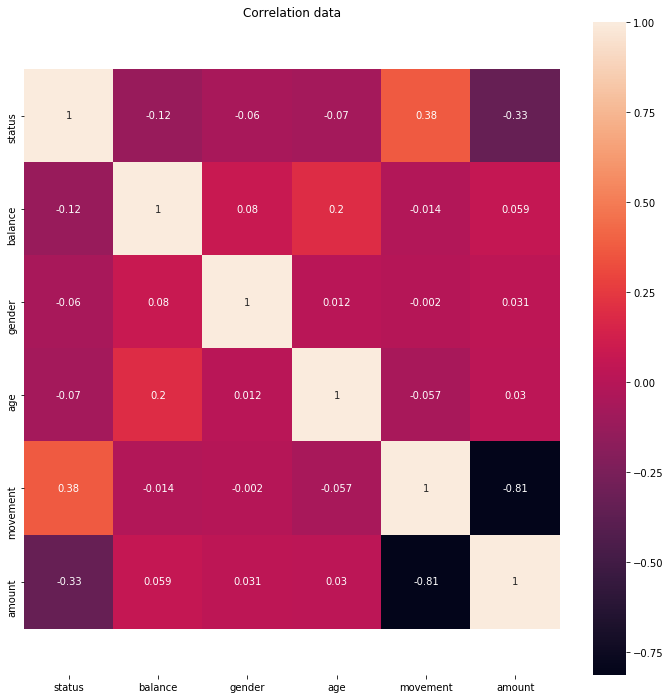

In [57]:
plt.figure(figsize=(12,12))

num_var = list(new_df.columns[new_df.dtypes != 'object'])

ax = sns.heatmap(new_df[num_var].corr(),annot=True)

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation data')

In [58]:

#Deriving salary amount from each customer:

salary=new_df[new_df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [59]:
customer = new_df.groupby(['customer_id', ]).mean().reset_index()
customer= customer[["customer_id","age","balance"]]
customer.head()


,customer_id,age,balance
0,CUS-1005756958,53.0,2275.852055
1,CUS-1117979751,21.0,9829.929000
2,CUS-1140341822,28.0,5699.212250
3,CUS-1147642491,34.0,9032.841186
4,CUS-1196156254,34.0,22272.433755


In [60]:
#Deriving new variables:

payment=new_df[new_df["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [61]:
#Merging all the necessary dataframes:

final_data= pd.merge(customer, payment, on='customer_id')
final_data = pd.merge(final_data, salary, on='customer_id')
final_data.head()

,customer_id,age,balance,payment,salary
0,CUS-1005756958,53.0,2275.852055,144.000000,970.47
1,CUS-1117979751,21.0,9829.929000,98.925000,3578.65
2,CUS-1140341822,28.0,5699.212250,142.000000,1916.51
3,CUS-1147642491,34.0,9032.841186,96.185185,1711.39
4,CUS-1196156254,34.0,22272.433755,43.100000,3903.73


### SCATTERPLOTS FOR ANNUAL SALARY DISTRIBUTION :

Text(0.5, 0, 'Balance')

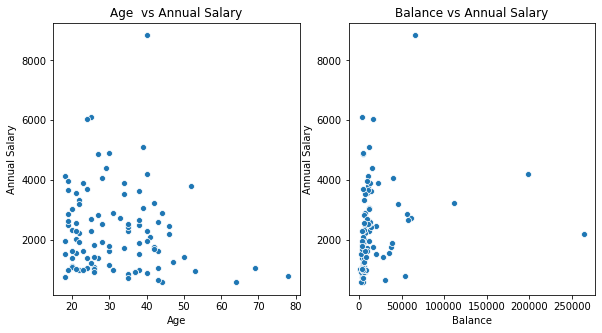

In [62]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(x=final_data['age'],y=final_data['salary'])
plt.title('Age  vs Annual Salary')
plt.ylabel('Annual Salary')
plt.xlabel('Age')

plt.subplot(1,3,2)
sns.scatterplot(x=final_data['balance'],y=final_data['salary'])
plt.title('Balance vs Annual Salary')
plt.ylabel('Annual Salary')
plt.xlabel('Balance')

In [63]:
final_data.columns


Index(['customer_id', 'age', 'balance', 'payment', 'salary'], dtype='object')

# MODELLING :

In [64]:
#Splitting the Target variables:

y = final_data.pop('salary')
X = final_data

In [65]:
#Removing the customer id columns as it will be not needed in modelling.
cust = final_data.pop('customer_id')

In [66]:
##Splitting data into Train and test :
import sklearn

# module for performing test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state =100)

In [67]:
X_train.shape

(80, 3)

In [68]:
X_test.shape

(20, 3)

# LINEAR REGRESSION: 

In [69]:
from sklearn.linear_model import LinearRegression

#intantiating an object:

lr = LinearRegression() 


In [70]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
lr.score(X_train, y_train)

0.07798833391277171

In [72]:
y_pred = lr.predict(X_test)

### METRICS FRO LINEAR REGRESSION

In [73]:
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

r2_test=r2_score(y_test, y_pred)

print('R-squared for test data:',r2_test)

mean_val=mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = np.sqrt(mean_val)

print('Mean Squared error for test data:',rmse)

R-squared for test data: 0.11182733570602921
Mean Squared error for test data: 1107.6549756387424


### The linear regression model achieved an R-squared value of 0.112. As the R-squared value is closer to 0, it indicates that the model explains very little of the variability of the annual salary. 
### The model also achieved a Root Mean Squared Error (RMSE) of 1107.65
##  Hence, this Linear Regression model has performed very poorly in predicting the average salary of the customer.

# DECISION TREE:

In [74]:
##Decision Tree:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict


In [75]:
model =  DecisionTreeRegressor(max_depth=5)

# Fit model
model.fit(X_train,y_train)

# Print the R-squared value for the model
model.score(X_train, y_train)

0.8844468015667489

In [77]:

y_pred_dt = model.predict(X_test)

# RMSE

mean_val_dt=mean_squared_error(y_true=y_test,y_pred=y_pred_dt)
rmse = np.sqrt(mean_val_dt)

print('Mean Squared error for test data:',rmse)

Mean Squared error for test data: 1148.2957948421463


## The Decision Tree model achieved an R-squared value of 0.88. As the R-squared value is closer to 1, it indicates that the model is able to explain of the variability of the annual salary.

## But the model achieved a Root Mean Squared Error (RMSE) of 1148. This is slightly higher than that of the linear regression model.


### Although the Decision Tree model has performed better than the Linear Regression model in terms of its R-square value, it has a higher RMSE.  
## RECOMMENDATIONS:
    - 1. Linear Regression or Descision Tree  both are not suitable for this data without improving the data. 
    - 2. May be adding some more useful variables or a different type of machine learning model.
    